# Web Scraping for Reddit & Predicting Comments

In this project, we will practice two major skills. Collecting data by scraping a website and then building a binary predictor.

As we discussed in week 2, and earlier today, there are two components to starting a data science problem: the problem statement, and acquiring the data.

For this article, your problem statement will be: _What characteristics of a post on Reddit contribute most to the overall interaction (as measured by number of comments)?_

Your method for acquiring the data will be scraping the 'hot' threads as listed on the [Reddit homepage](https://www.reddit.com/). You'll acquire _AT LEAST FOUR_ pieces of information about each thread:
1. The title of the thread
2. The subreddit that the thread corresponds to
3. The length of time it has been up on Reddit
4. The number of comments on the thread

Once you've got the data, you will build a classification model that, using Natural Language Processing and any other relevant features, predicts whether or not a given Reddit post will have above or below the _median_ number of comments.

**BONUS PROBLEMS**
1. If creating a logistic regression, GridSearch Ridge and Lasso for this model and report the best hyperparameter values.
1. Scrape the actual text of the threads using Selenium (you'll learn about this in Webscraping II).
2. Write the actual article that you're pitching and turn it into a blog post that you host on your personal website.

### Scraping Thread Info from Reddit.com

#### Set up a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
url = "http://www.reddit.com"

In [3]:
headers = {
    'User-Agent': 'Project3-ClaudiaGreco',
    'From': 'claugreco@gmail.com'
}

response = requests.get(url, headers=headers)

#response = requests.get(url)

print(response.status_code)

html = response.text

print(html[:700])

200
<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head><title>reddit: the front page of the internet</title><meta name="keywords" content=" reddit, reddit.com, vote, comment, submit " /><meta name="description" content="reddit: the front page of the internet" /><meta name="referrer" content="always"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><link type="application/opensearchdescription+xml" rel="search" href="/static/opensearch.xml"/><link rel="canonical" href="https://www.reddit.com/" /><meta name="viewport" content="width=1024"><link rel="dns-prefetch" href="//out.reddit.com"><link rel="preconnect" href="//out.reddit.com"><link re


In [4]:
soup = BeautifulSoup(html, 'lxml')
soup.text

'reddit: the front page of the internetr.setup({"ajax_domain": "www.reddit.com", "poisoning_canary": null, "post_site": "", "gold": false, "poisoning_report_mac": null, "requires_eu_cookie_policy": false, "nsfw_media_acknowledged": false, "stats_domain": "https://stats.redditmedia.com", "feature_onboarding_splash": "active", "cur_screen_name": "", "feature_expando_events": true, "facebook_app_id": "322647334569188", "loid": "00000000000y7hxu52", "is_sponsor": false, "feature_autofill_username": "control_2", "user_id": false, "pref_email_messages": false, "feature_new_report_flow": true, "feature_subscribe_join_follow_test": null, "logged": false, "feature_heartbeat_events": true, "ads_loading_timeout_ms": 5000, "over_18": false, "feature_ads_user_matching": false, "external_frame": false, "mweb_blacklist_expressions": ["^/prefs/?", "^/live/?", "/message/compose", "/m/", "^/subreddits/create", "^/gold", "^/advertising", "^/promoted", "^/buttons"], "feature_hover_user_ui_holdout": false,

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The thread title is within an `<a>` tag with the attribute `data-event-action="title"`.
- The time since the thread was created is within a `<time>` tag with attribute `class="live-timestamp"`.
- The subreddit is within an `<a>` tag with the attribute `class="subreddit hover may-blank"`.
- The number of comments is within an `<a>` tag with the attribute data-event-action="comments"`.

In [5]:
#Getting data from 1st page

results_list = []
all_td = soup.find_all('div', {'class':'top-matter'})
for element in all_td:
    result = {}
    
    title = element.find('a', {'data-event-action':'title'})
    #title = element.find('a')
    if title:
        result['title'] = title.text
    
    subreddit = element.find('a', {'class':'subreddit hover may-blank'})
    if subreddit:
        result['subreddit'] = subreddit.text.strip()[2:]

        
    #time = element.find('p', {'class':'tagline'})
    time = element.find('time', {'class':'live-timestamp'})
    if time:
        result['time'] = time.text
        
    #comments = element.find('li', {'class':'first'})
    comments = element.find('a', {'data-event-action':'comments'})
    if comments:
        result['comments'] = int(comments.text.strip()[0:-9])
    
    results_list.append(result)


df1 = pd.DataFrame(results_list)
df1

,comments,subreddit,time,title
0,4193,pics,3 hours ago,This is what democracy looks like. View from t...
1,337,todayilearned,5 hours ago,TIL a party boat carrying sixty men and women ...
2,528,web_design,3 hours ago,Animated login avatar
3,743,UpliftingNews,5 hours ago,"Peter Wang, a 15-year-old member of the Junior..."
4,740,LifeProTips,4 hours ago,LPT: Keep a separate master resume with ALL pr...
5,1593,woahdude,5 hours ago,First image ever taken of the Hydrogen Atom
6,83,Patriots,5 hours ago,Comprehensive look at just how good we've had ...
7,1912,funny,5 hours ago,Not a method actor
8,676,gifs,4 hours ago,I'm gonna eat you little fishy
9,182,PandR,6 hours ago,Donna's Contribution to Pawnee's Time Capsule


## Write 4 functions to extract these items (one function for each): title, time, subreddit, and number of comments.¶
Example
```python
def extract_title_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

In [6]:
def extract_title(result):
    title = element.find('a', {'data-event-action':'title'})
    if title:
        return title.text

def extract_subreddit(result):
    subreddit = element.find('a', {'class':'subreddit hover may-blank'})
    if subreddit:
        return subreddit.text.strip()[2:]

def extract_time(result):
    time = element.find('time', {'class':'live-timestamp'})
    if time:
        return time.text

def extract_comment(result):
    comments = element.find('a', {'data-event-action':'comments'})
    if comments:
        return int(comments.text.strip()[0:-9])

Now, to scale up our scraping, we need to accumulate more results.

First, look at the source of a Reddit.com page: (https://www.reddit.com/).
Try manually changing the page by clicking the 'next' button on the bottom. Look at how the url changes.

After leaving the Reddit homepage, the URLs should look something like this:
```
https://www.reddit.com/?count=25&after=t3_787ptc
```

The URL here has two query parameters
- count is the result number that the page starts with
- after is the unique id of the last result on the _previous_ page

In order to scrape lots of pages from Reddit, we'll have to change these parameters every time we make a new request so that we're not just scraping the same page over and over again. Incrementing the count by 25 every time will be easy, but the bizarre code after `after` is a bit trickier.

To start off, let's look at a block of HTML from a Reddit page to see how we might solve this problem:
```html
<div class=" thing id-t3_788tye odd gilded link " data-author="LordSneaux" data-author-fullname="t2_j3pty" data-comments-count="1548" data-context="listing" data-domain="v.redd.it" data-fullname="t3_788tye" data-kind="video" data-num-crossposts="0" data-permalink="/r/funny/comments/788tye/not_all_heroes_wear_capes/" data-rank="25" data-score="51468" data-subreddit="funny" data-subreddit-fullname="t5_2qh33" data-timestamp="1508775581000" data-type="link" data-url="https://v.redd.it/ush0rh2tultz" data-whitelist-status="all_ads" id="thing_t3_788tye" onclick="click_thing(this)">
      <p class="parent">
      </p>
      <span class="rank">
       25
      </span>
      <div class="midcol unvoted">
       <div aria-label="upvote" class="arrow up login-required access-required" data-event-action="upvote" role="button" tabindex="0">
       </div>
       <div class="score dislikes" title="53288">
        53.3k
       </div>
       <div class="score unvoted" title="53289">
        53.3k
       </div>
       <div class="score likes" title="53290">
        53.3k
       </div>
       <div aria-label="downvote" class="arrow down login-required access-required" data-event-action="downvote" role="button" tabindex="0">
       </div>
      </div>
```

Notice that within the `div` tag there is an attribute called `id` and it is set to `"thing_t3_788tye"`. By finding the last ID on your scraped page, you can tell your _next_ request where to start (pass everything after "thing_").

For more info on this, you can take a look at the [Reddit API docs](https://github.com/reddit/reddit/wiki/JSON)

## Write one more function that finds the last `id` on the page, and stores it.

In [7]:
main_table = soup.find('div', {'id':'siteTable'})
page = main_table.find_all ('div')


for element in page: 
    idx = element['data-fullname']
    print (idx)
    break

t3_7z7u1u


## (Optional) Collect more information

While we only require you to collect four features, there may be other info that you can find on the results page that might be useful. Feel free to write more functions so that you have more interesting and useful data.

In [10]:
## YOUR CODE HERE

## Now, let's put it all together.

Use the functions you wrote above to parse out the 4 fields - title, time, subreddit, and number of comments. Create a dataframe from the results with those 4 columns.

In [11]:
#Getting data from other pages

url_template = "http://www.reddit.com/?count={}&after={}"
max_results = 5000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []
results_list = []

for start in range(0, max_results, 25):
    
    headers = {
    'User-Agent': 'Project3-ClaudiaGreco',
    'From': 'claugreco@gmail.com'
    }

    url = url_template.format(start, idx)
    #print ('URL: ', url)
    response = requests.get(url, headers=headers)
    html = response.text
    
    soup = BeautifulSoup(html, 'lxml')
    
    all_td = soup.find_all('div', {'class':'top-matter'})
    for element in all_td:
        result = {}
    
        title = element.find('a', {'data-event-action':'title'})
        if title:
            result['title'] = title.text
    
        subreddit = element.find('a', {'class':'subreddit hover may-blank'})
        if subreddit:
            result['subreddit'] = subreddit.text.strip()[2:]

        time = element.find('time', {'class':'live-timestamp'})
        if time:
            result['time'] = time.text
        
        comments = element.find('a', {'data-event-action':'comments'})
        if comments:
            result['comments'] = comments.text.strip()[0:-9]

        
        results_list.append(result)

        #Next page id
    main_table = soup.find('div', {'id':'siteTable'})
    page = main_table.find_all ('div')

    for element in page: 
        idx = element['data-fullname']
        if idx:
            #print (idx)
            break


df2 = pd.DataFrame(results_list)
df2

,comments,subreddit,time,title
0,260,Shitty_Car_Mods,9 hours ago,I thought I was having a stroke
1,173,DnD,8 hours ago,"So, my mom rolled a druid."
2,724,books,8 hours ago,Amazon confirm they will be adapting Iain M Ba...
3,1058,science,11 hours ago,How a person responds to a difficult life even...
4,274,IDontWorkHereLady,7 hours ago,"Pour water on me, Lose your money."
5,43,Blep,7 hours ago,My little dick faced blep machine.
6,36,crappyoffbrands,6 hours ago,"Everybody make way, Swoletrooper coming through!"
7,17,futurama,5 hours ago,How I feel when I watch the Olympics
8,61,KenM,7 hours ago,Ken M on global warming
9,359,pics,8 hours ago,Brave Iranian woman just before being arrested...


In [12]:
##concat dataframes

frames = [df1, df2]

reddit = pd.concat(frames)
reddit = reddit.reset_index(drop=True)
reddit

,comments,subreddit,time,title
0,4193,pics,3 hours ago,This is what democracy looks like. View from t...
1,337,todayilearned,5 hours ago,TIL a party boat carrying sixty men and women ...
2,528,web_design,3 hours ago,Animated login avatar
3,743,UpliftingNews,5 hours ago,"Peter Wang, a 15-year-old member of the Junior..."
4,740,LifeProTips,4 hours ago,LPT: Keep a separate master resume with ALL pr...
5,1593,woahdude,5 hours ago,First image ever taken of the Hydrogen Atom
6,83,Patriots,5 hours ago,Comprehensive look at just how good we've had ...
7,1912,funny,5 hours ago,Not a method actor
8,676,gifs,4 hours ago,I'm gonna eat you little fishy
9,182,PandR,6 hours ago,Donna's Contribution to Pawnee's Time Capsule


In [16]:
reddit.shape

(5025, 4)

In [17]:
reddit.nunique()

comments     315
subreddit    246
time          20
title        309
dtype: int64

In [18]:
#We have so many duplicates..

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [19]:
# Export to csv
reddit.to_csv('data_reddit.csv')

## Getting data using PRAW

In [20]:
import praw
import json

In [21]:
with open ('apipass.json') as f :
    keys = json.loads(f.read())

reddit = praw.Reddit(client_id= keys['client_id'], client_secret=keys['client_secret'],
                     username= keys['username'], password= keys['password'], 
                     user_agent= keys['user_agent'])

In [22]:
import datetime

hot_posts =  reddit.subreddit('all').hot(limit=5000)

hot_list = []
for submit in hot_posts:
    if not submit.stickied:
        hot = {}
        hot['title'] = submit.title
        hot['votes'] = submit.ups
        hot['comments'] = submit.num_comments
        hot['date_created'] = datetime.datetime.fromtimestamp(submit.created)
        #hot['is_video'] = submit.is_video
        hot['subreddit'] = submit.subreddit
        hot_list.append(hot)
        
hot_df = pd.DataFrame(hot_list)

In [23]:
hot_df.head()

,comments,date_created,subreddit,title,votes
0,1450,2018-02-21 22:07:58,nba,Wow the Warriors are really good now. Is Steph...,13927
1,535,2018-02-21 20:43:34,web_design,Animated login avatar,38056
2,4499,2018-02-21 21:33:31,pics,This is what democracy looks like. View from t...,32488
3,366,2018-02-21 20:24:23,todayilearned,TIL a party boat carrying sixty men and women ...,16878
4,745,2018-02-21 19:58:15,LifeProTips,LPT: Keep a separate master resume with ALL pr...,41262


In [24]:
hot_df.nunique()

comments         450
date_created    4677
subreddit       2446
title           4779
votes           1559
dtype: int64

In [25]:
# Export to csv
hot_df.to_csv('data_redditv2.csv')

## Predicting comments using Random Forests + Another Classifier

#### Load in the the data of scraped results

In [5]:
data = pd.read_csv('data_redditv2.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 6 columns):
Unnamed: 0      4971 non-null int64
comments        4971 non-null int64
date_created    4971 non-null object
subreddit       4971 non-null object
title           4971 non-null object
votes           4971 non-null int64
dtypes: int64(3), object(3)
memory usage: 233.1+ KB


In [7]:
data.head()

,Unnamed: 0,comments,date_created,subreddit,title,votes
0,0,1450,2018-02-21 22:07:58,nba,Wow the Warriors are really good now. Is Steph...,13927
1,1,535,2018-02-21 20:43:34,web_design,Animated login avatar,38056
2,2,4499,2018-02-21 21:33:31,pics,This is what democracy looks like. View from t...,32488
3,3,366,2018-02-21 20:24:23,todayilearned,TIL a party boat carrying sixty men and women ...,16878
4,4,745,2018-02-21 19:58:15,LifeProTips,LPT: Keep a separate master resume with ALL pr...,41262


In [8]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data = data.dropna()

In [9]:
data.drop_duplicates()

,comments,date_created,subreddit,title,votes
0,1450,2018-02-21 22:07:58,nba,Wow the Warriors are really good now. Is Steph...,13927
1,535,2018-02-21 20:43:34,web_design,Animated login avatar,38056
2,4499,2018-02-21 21:33:31,pics,This is what democracy looks like. View from t...,32488
3,366,2018-02-21 20:24:23,todayilearned,TIL a party boat carrying sixty men and women ...,16878
4,745,2018-02-21 19:58:15,LifeProTips,LPT: Keep a separate master resume with ALL pr...,41262
5,107,2018-02-21 21:59:42,me_irl,me irl,7289
6,1600,2018-02-21 19:31:19,woahdude,First image ever taken of the Hydrogen Atom,47806
7,1943,2018-02-21 19:29:31,funny,Not a method actor,39035
8,699,2018-02-21 20:03:32,gifs,I'm gonna eat you little fishy,25085
9,6028,2018-02-21 19:49:26,politics,The right-wing sliming of Douglas High student...,40367


In [10]:
data.shape

(4971, 5)

In [11]:
data['comments'] = data['comments'].astype(int)

In [12]:
data['comments'].describe()

count    4971.000000
mean       76.020720
std       310.959539
min         0.000000
25%         5.000000
50%        16.000000
75%        47.000000
max      6381.000000
Name: comments, dtype: float64

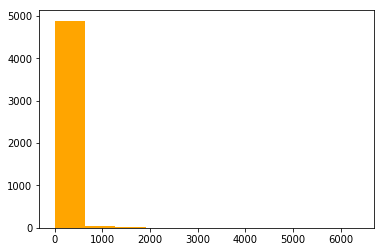

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data['comments'], color='orange');

In [14]:
data[['comments', 'subreddit']].groupby('comments').count()

,subreddit
comments,
0,180
1,232
2,241
3,212
4,199
5,194
6,186
7,157
8,143


#### We want to predict a binary variable - whether the number of comments was low or high. Compute the median number of comments and create a new binary variable that is true when the number of comments is high (above the median)

We could also perform Linear Regression (or any regression) to predict the number of comments here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW number of comments.

While performing regression may be better, performing classification may help remove some of the noise of the extremely popular threads. We don't _have_ to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of comment numbers. 

In [41]:
#median number of comments

from statistics import median
import numpy as np
import seaborn as sns
import pandas as pd

median_comments= median(data['comments'])
mean_comments = np.mean(data['comments'])
percentile_75 = np.percentile(data['comments'], 75)
percentile_50 = np.percentile(data['comments'], 50)  # same as median


print (median_comments)
print (mean_comments)
print (percentile_75)
print (percentile_50)

16
76.02072017702676
47.0
16.0


In [16]:
data['popular'] = [1 if x >= percentile_50 else 0 for x in data['comments']]
#Binarizer does the same

In [17]:
data.head(20)

,comments,date_created,subreddit,title,votes,popular
0,1450,2018-02-21 22:07:58,nba,Wow the Warriors are really good now. Is Steph...,13927,1
1,535,2018-02-21 20:43:34,web_design,Animated login avatar,38056,1
2,4499,2018-02-21 21:33:31,pics,This is what democracy looks like. View from t...,32488,1
3,366,2018-02-21 20:24:23,todayilearned,TIL a party boat carrying sixty men and women ...,16878,1
4,745,2018-02-21 19:58:15,LifeProTips,LPT: Keep a separate master resume with ALL pr...,41262,1
5,107,2018-02-21 21:59:42,me_irl,me irl,7289,1
6,1600,2018-02-21 19:31:19,woahdude,First image ever taken of the Hydrogen Atom,47806,1
7,1943,2018-02-21 19:29:31,funny,Not a method actor,39035,1
8,699,2018-02-21 20:03:32,gifs,I'm gonna eat you little fishy,25085,1
9,6028,2018-02-21 19:49:26,politics,The right-wing sliming of Douglas High student...,40367,1


In [18]:
data.popular.value_counts()

1    2523
0    2448
Name: popular, dtype: int64

#### Thought experiment: What is the baseline accuracy for this model?

In [19]:

# baseline = median_comments


#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature. 

In [20]:
data['subreddit'].nunique()

2446

In [21]:
data['subreddit'].value_counts()

politics               11
funny                   9
todayilearned           9
dankmemes               8
me_irl                  8
aww                     8
Overwatch               8
Animemes                8
pics                    8
Rainbow6                8
GlobalOffensive         8
BlackPeopleTwitter      8
soccer                  8
nba                     8
gaming                  8
AskReddit               8
gifs                    8
rupaulsdragrace         7
PeopleFuckingDying      7
SquaredCircle           7
2007scape               7
FireEmblemHeroes        7
oddlysatisfying         7
tumblr                  7
greentext               7
PrequelMemes            7
interestingasfuck       7
videos                  7
Tinder                  7
leagueoflegends         7
                       ..
animelegwear            1
AlexisRen               1
GirlswithGlasses        1
JerkOffToCelebs         1
arresteddevelopment     1
u_sarah-xxx             1
uwotm8                  1
KahoShibuya 

In [22]:
data['subreddit_other'] = [subred if (data['subreddit'] == subred).sum() > 3 else 'other' for subred in data['subreddit']]

In [39]:
data['subreddit_other'].value_counts()

other                   2842
politics                  11
funny                      9
todayilearned              9
aww                        8
GlobalOffensive            8
Animemes                   8
Rainbow6                   8
BlackPeopleTwitter         8
Overwatch                  8
me_irl                     8
AskReddit                  8
dankmemes                  8
soccer                     8
pics                       8
nba                        8
gaming                     8
gifs                       8
oddlysatisfying            7
greentext                  7
worldnews                  7
FortNiteBR                 7
PeopleFuckingDying         7
SquaredCircle              7
news                       7
memes                      7
tumblr                     7
MonsterHunter              7
DDLC                       7
FireEmblemHeroes           7
                        ... 
Iota                       4
Dachshund                  4
esist                      4
MovieDetails  

In [42]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)
        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)
        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")
        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape
        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]
        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))
        self.categories_ = [le.classes_ for le in self._label_encoders_]
        return self
    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)
        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)
        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)
        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]
        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [25]:
ce = CategoricalEncoder(encoding='onehot-dense',handle_unknown='ignore')

In [26]:
dummy_var_df = ce.fit_transform(data['subreddit_other'].values.reshape(-1, 1))

In [27]:
dummy_var_df = pd.DataFrame(dummy_var_df)

In [28]:
dummy_var_df.head()

,0,1,2,3,4,5,6,7,8,9,...,434,435,436,437,438,439,440,441,442,443
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data['popular'].shape

(4971,)

In [30]:
dummy_var_df.shape

(4971, 444)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


#Train/Test Split
y = data['popular']
X = dummy_var_df

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)


In [32]:
%%time

#RandomizeSearchCV to find best parameters

from sklearn.model_selection import RandomizedSearchCV

params =  {"max_depth": [10,15,25]
            ,"min_samples_split" :range(20,100,10)
            ,"min_samples_leaf": range(1,10,2)
            ,"n_estimators" : [50,1000, 2500]
            ,"max_features": (4,50, "sqrt")
             }


randomsearch = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

randomsearch = randomsearch.fit(X_train, y_train)
learned_parameters =randomsearch.best_params_

print('RandomizedSearch')
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)
print(randomsearch.best_estimator_.score(X_test,y_test))



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearch
{'n_estimators': 1000, 'min_samples_split': 40, 'min_samples_leaf': 3, 'max_features': 50, 'max_depth': 25}
0.609657947686
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.622687047466
CPU times: user 7.02 s, sys: 119 ms, total: 7.14 s
Wall time: 1min 28s


In [46]:
#Random Forest Classifier with best_param


rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features= learned_parameters['max_features']
                            ,min_samples_leaf= learned_parameters['min_samples_leaf']
                            ,min_samples_split= learned_parameters['min_samples_split']
                            ,n_estimators= learned_parameters["n_estimators"]
                            )

model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print (rfc.feature_importances_)
print(classification_report(y_test,predictions))

Train Accuracy :  0.632595573441
Test Accuracy  :  0.621078037007
Confusion matrix :  [[871 349]
 [593 673]]
[  4.66276310e-03   0.00000000e+00   7.94528802e-04   0.00000000e+00
   6.12670576e-05   0.00000000e+00   1.64091604e-03   0.00000000e+00
   3.43883397e-03   1.03530716e-05   0.00000000e+00   4.32615961e-03
   0.00000000e+00   4.23809629e-03   0.00000000e+00   1.20021448e-02
   6.76838762e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.98069581e-03   1.52623302e-03   1.26991026e-02
   0.00000000e+00   4.68867002e-03   0.00000000e+00   0.00000000e+00
   5.96120253e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   7.48854141e-06   4.61315301e-03   0.00000000e+00   6.50920008e-03
   0.00000000e+00   0.00000000e+00   4.37791756e-06   2.84933824e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.68672291e-03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.36806701e-03   7.70160805e-04   0.00000000e+00   0.0000000

#### Create a few new variables in your dataframe to represent interesting features of a thread title.
- For example, create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title. 
- Then build a new Random Forest with these features. Do they add any value?
- After creating these variables, use count-vectorizer to create features based on the words in the thread titles.
- Build a new random forest model with subreddit and these new features included.

In [47]:
#Create a feature that represents whether 'cat' is in the title or whether 'funny' is in the title.

# if 'cat' is in the title
data['cat'] = [1 if 'cat' in x else 0 for x in data['title']]

# if 'funny' is in the title
data['funny'] = [1 if 'funny' in x else 0 for x in data['title']]

# if 'love' is in the title
data['love'] = [1 if 'love' in x else 0 for x in data['title']]


In [48]:
data['cat'].value_counts()

0    4911
1      60
Name: cat, dtype: int64

In [49]:
data['funny'].value_counts()

0    4966
1       5
Name: funny, dtype: int64

In [50]:
data['love'].value_counts()

0    4912
1      59
Name: love, dtype: int64

In [51]:
#Then build a new Random Forest with these features. 

y = data['popular']
X = data [['cat','funny', 'love']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)


#Find best param


params =  {"max_depth": [10,15,25]
            ,"min_samples_split" :range(20,100,10)
            ,"min_samples_leaf": range(1,10,2)
            ,"n_estimators" : [50,1000, 2500]
            ,"max_features": (1,"sqrt")
             }


randomsearch = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

randomsearch = randomsearch.fit(X_train, y_train)
learned_parameters =randomsearch.best_params_

print('RandomizedSearch')
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)
print(randomsearch.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.3s


RandomizedSearch
{'n_estimators': 50, 'min_samples_split': 40, 'min_samples_leaf': 5, 'max_features': 1, 'max_depth': 10}
0.507444668008
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.508447304907


[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   23.8s finished


In [52]:
#Fitting with learned params

rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features= learned_parameters['max_features']
                            ,min_samples_leaf= learned_parameters['min_samples_leaf']
                            ,min_samples_split= learned_parameters['min_samples_split']
                            ,n_estimators= learned_parameters["n_estimators"]
                            )

model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))



Train Accuracy :  0.507444668008
Test Accuracy  :  0.508447304907
Confusion matrix :  [[  12 1208]
 [  14 1252]]
             precision    recall  f1-score   support

          0       0.46      0.01      0.02      1220
          1       0.51      0.99      0.67      1266

avg / total       0.49      0.51      0.35      2486



In [53]:
#Count Vectorizer to create features based on the words in the thread titles.

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

cvec = CountVectorizer(stop_words='english')
cvec.fit(data['title'])
cvecdata = cvec.transform(data['title'])

dfcv  = pd.DataFrame(cvecdata.todense(), columns=cvec.get_feature_names())
dfcv.head()

,00,000,0003571,00pm,01,017,02,04,07,08,...,år,æternam,èze,última,świata,šejić,ƃuoʎuuɐ,ネヲ,로제,위키미키
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
dfcv.shape

(4971, 10569)

In [70]:
df_words = pd.DataFrame(dfcv.sum(axis=0).sort_values(ascending=False).head(15))

In [82]:
df_words

just      168
new       160
like      106
time       98
today      81
got        79
day        79
good       74
people     60
don        59
old        57
best       57
love       53
little     53
think      52
Name: 0, dtype: int64

In [ ]:
vocab = cvec.get_feature_names()
print(vocab)

In [84]:
#Build a model with the CountVectorizer feature

y = data['popular']
X = dfcv

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)

#Find best param


params =  {"max_depth": [10,15,25]
            ,"min_samples_split" :range(20,100,10)
            ,"min_samples_leaf": range(1,10,2)
            ,"n_estimators" : [50,1000, 2500]
            ,"max_features": (5,"sqrt")
             }


randomsearch = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

randomsearch = randomsearch.fit(X_train, y_train)
learned_parameters =randomsearch.best_params_

print('RandomizedSearch')
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)
print(randomsearch.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearch
{'n_estimators': 50, 'min_samples_split': 40, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15}
0.539235412475
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.516090104586


In [85]:
#Fitting with learned params

rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features= learned_parameters['max_features']
                            ,min_samples_leaf= learned_parameters['min_samples_leaf']
                            ,min_samples_split= learned_parameters['min_samples_split']
                            ,n_estimators= learned_parameters["n_estimators"]
                            )

model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))




Train Accuracy :  0.668812877264
Test Accuracy  :  0.566773934031
Confusion matrix :  [[842 378]
 [699 567]]
             precision    recall  f1-score   support

          0       0.55      0.69      0.61      1220
          1       0.60      0.45      0.51      1266

avg / total       0.57      0.57      0.56      2486



In [ ]:
dummy_var_df.shape

In [ ]:
data['cat'].shape

In [ ]:
data['funny'].shape

In [ ]:
data['love'].shape

In [ ]:
dfcv.shape

In [86]:
frames = [dummy_var_df, data['cat'], data['funny'], data['love'], dfcv]

features_df = pd.concat(frames, axis=1, ignore_index=True )

In [87]:
features_df.shape

(4971, 11016)

In [ ]:
y.value_counts()

In [88]:
y = data['popular']
X = features_df

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)

#Find best param


params =  {"max_depth": [10,15,25]
            ,"min_samples_split" :range(20,100,10)
            ,"min_samples_leaf": range(1,10,2)
            ,"n_estimators" : [50,1000, 2500]
            ,"max_features": (5,"sqrt")
             }


randomsearch = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

randomsearch = randomsearch.fit(X_train, y_train)
learned_parameters =randomsearch.best_params_

print('RandomizedSearch')
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)
print(randomsearch.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   58.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearch
{'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10}
0.602816901408
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.631134352373


In [89]:
#Fitting with learned params

rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features= learned_parameters['max_features']
                            ,min_samples_leaf= learned_parameters['min_samples_leaf']
                            ,min_samples_split= learned_parameters['min_samples_split']
                            ,n_estimators= learned_parameters["n_estimators"]
                            )

model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))




Train Accuracy :  0.701810865191
Test Accuracy  :  0.633547868061
Confusion matrix :  [[756 464]
 [447 819]]
             precision    recall  f1-score   support

          0       0.63      0.62      0.62      1220
          1       0.64      0.65      0.64      1266

avg / total       0.63      0.63      0.63      2486



#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model, as well as any other metrics you feel are appropriate. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold


y = data['popular']
X = features_df

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=41)

rfc = RandomForestClassifier()
model = rfc.fit(X, y)

s = cross_val_score(rfc, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

#### Repeat the model-building process with a non-tree-based method.

In [102]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

y = data['popular']
X = features_df

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)

logreg = LogisticRegression()
model = logreg.fit(X_train,y_train)

predictions = model.predict(X_test)


print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


Train Accuracy :  0.95814889336
Test Accuracy  :  0.635559131134
Confusion matrix :  [[839 381]
 [525 741]]
             precision    recall  f1-score   support

          0       0.62      0.69      0.65      1220
          1       0.66      0.59      0.62      1266

avg / total       0.64      0.64      0.63      2486



#### Use Count Vectorizer from scikit-learn to create features from the thread titles. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [90]:
title = data['title'][0]
len(title)

82

In [91]:
data['title_len'] = [len(x) for x in data['title']]

In [92]:
data['title_len'].value_counts()

32     96
15     90
27     90
17     90
25     89
19     87
21     86
18     85
31     80
23     80
37     79
41     78
14     77
12     75
33     75
29     74
16     73
26     73
20     72
11     72
22     72
39     70
38     70
24     70
36     67
13     64
30     64
40     62
34     60
9      59
       ..
267     1
258     1
242     1
233     1
273     1
237     1
228     1
241     1
216     1
204     1
249     1
253     1
265     1
188     1
269     1
180     1
279     1
238     1
150     1
154     1
152     1
174     1
217     1
140     1
186     1
260     1
226     1
230     1
234     1
299     1
Name: title_len, Length: 253, dtype: int64

In [93]:
data['title_len'].sort_values(ascending= False)

447     300
4       300
710     299
1540    298
3243    298
285     298
10      297
2806    297
1385    296
4327    296
546     294
3337    294
3922    294
1654    294
548     294
282     294
2172    294
4079    292
1304    288
2549    288
2575    286
157     279
4422    276
3413    275
4192    275
3025    273
3124    270
4088    270
2588    269
143     267
       ... 
1936      4
108       4
4251      4
4223      4
1880      4
1483      3
1626      3
1953      3
1356      3
734       3
3362      3
2228      3
1823      3
2230      3
380       3
1535      3
1806      3
246       3
3837      3
379       3
292       3
49        3
1026      3
1737      3
4288      3
4491      2
988       2
4040      2
877       2
1579      1
Name: title_len, Length: 4971, dtype: int64

In [94]:
frames = [data['title_len'], dfcv]

my_features = pd.concat(frames, axis=1, ignore_index=True )

In [95]:
my_features.shape

(4971, 10570)

In [96]:
#Build a model with tittle length and words in title

y = data['popular']
X = my_features

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.5, random_state=142)

#Find best param


params =  {"max_depth": [10,15,25]
            ,"min_samples_split" :range(20,100,10)
            ,"min_samples_leaf": range(1,10,2)
            ,"n_estimators" : [50,1000, 2500]
            ,"max_features": (5,"sqrt")
             }


randomsearch = RandomizedSearchCV(RandomForestClassifier(), params, cv=5, 
                                      n_iter=10, verbose=1, n_jobs=2, random_state=42)

randomsearch = randomsearch.fit(X_train, y_train)
learned_parameters =randomsearch.best_params_

print('RandomizedSearch')
print(randomsearch.best_params_)
print(randomsearch.best_score_)
print(randomsearch.best_estimator_)
print(randomsearch.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   50.3s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   52.4s finished


RandomizedSearch
{'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10}
0.581488933602
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.612228479485


In [97]:

#Fitting with learned params

rfc = RandomForestClassifier(max_depth = learned_parameters["max_depth"]
                            ,max_features= learned_parameters['max_features']
                            ,min_samples_leaf= learned_parameters['min_samples_leaf']
                            ,min_samples_split= learned_parameters['min_samples_split']
                            ,n_estimators= learned_parameters["n_estimators"]
                            )

model = rfc.fit(X_train,y_train)

predictions = model.predict(X_test)

print ("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
print ("Test Accuracy  : ", accuracy_score(y_test, predictions))
print ("Confusion matrix : ", confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))



Train Accuracy :  0.671227364185
Test Accuracy  :  0.615848753017
Confusion matrix :  [[578 642]
 [313 953]]
             precision    recall  f1-score   support

          0       0.65      0.47      0.55      1220
          1       0.60      0.75      0.67      1266

avg / total       0.62      0.62      0.61      2486



# Executive Summary
---
Put your executive summary in a Markdown cell below.

#### EXECUTIVE SUMMARY


The purpose of this report is to summarize the Data Acquisition processing, the implemented machine learning Classification modeling with Natural Language Processing techniques, and all corresponding Data Analyses used to build a binary predictor to investigate "How to create a Reddit post that will get the most engagement from Reddit users". 
For the first step, the Data Acquisition process, two different method were used: Web Scrapping and PRAW (The Python Reddit API Wrapper). For both methods four pieces of information were collected about the 'hot' threads listed on the Reddit homepage (www.reddit.com): 
1.	The title of the thread
2.	The subreddit that the thread corresponds to
3.	The length of time it has been up on Reddit
4.	The number of comments on the thread
After Web Scrapping 5000 threats, only 10% were non-duplicate data, that is when PRAW was used to collect the data sample. At the end of cleaning the dataset included: 4779 observations split in 2446 subreddits, with their corresponding number of comments, numbers of votes and date created.

The specific problem statement is: What characteristics of a post on Reddit are most predictive of the overall interaction on a thread (as measured by number of comments)? Once we've got the data, we built a model that predicts whether or not a given Reddit post will have above or below the median number of comments. 
Since we want to predict a binary variable, whether the number of comments was low or high, we created a new binary variable (called 'popular') that is true (1) when the number of comments is high (above the median), false (0) otherwise, and converted into a binary classification problem, by predicting two classes, HIGH vs LOW number of comments. For this binary classification problem, we modeled using RandomForest from sklearn and RandomizedSearchCV for feature selection.

We built the model with different features and analyzed their performance.
##### Only "subreddit": (2446 distinct subreddits): 
- Train Accuracy: 0.633 
- Test Accuracy: 0.621 
    
##### Features that represents whether 'cat' or 'funny' or 'love' is in the title.
We found that 'cat' was in 60 titles and was not present in 4911 titles,
'funny' was in 5 titles and was not present in 4966 titles,
'love' was in 59 titles and was not present in 4912 titles.
- Train Accuracy: 0.507 
- Test Accuracy: 0.508

###### Features based on the words in the thread titles using Count-vectorizer, removing stop-words
We found 10569 different words. 
- Train Accuracy: 0.669 
- Test Accuracy: 0.567

###### Using all above features together (subreddits, 'cat', 'funny', 'love' and words)
- Train Accuracy: 0.702
- Test Accuracy: 0.634

###### Lastly, fitting the model with the words on the tittle and the length of the title 
- Train Accuracy: 0.671
- Test Accuracy: 0.612

In conclusion, the better result we got a better accuracy in predicting if a threat will have HIGH or LOW comments was 70% using: subreddits, 'cat', 'funny', 'love' and words, as predictors.


### BONUS
Refer to the README for the bonus parts

In [ ]:
## YOUR CODE HERE